# Jamboree Education - Linear Regression

#### Context

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.



#### Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

#### Concept Used:

- Exploratory Data Analysis
- Linear Regression

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 
import statsmodels.api as sm

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_data = pd.read_csv("jamboree_admission.csv") # Saving to the original data set to keep the data intact
data = original_data.copy(deep= True)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
print("Features in the dataset: ", data.shape[1])
print("Records in the dataset: ", data.shape[0])

Features in the dataset:  9
Records in the dataset:  500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.columns = data.columns.str.strip() # since few features is having the spaces which might cause problem
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
data.isnull().sum() # checking for null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.duplicated().sum() # check for duplicate

0

There are 0 duplicates and null null values in the dataset...

In [8]:
# all of them are the numerical features
# let's look at the summary
data.describe(include="all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
# Since there are few categorical Columns and Numerical Columns let's separate them
# Also separate the Target variable
cat_cols = ["University Rating","SOP", "LOR", "Research"]
num_cols = ["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit"]

target_var = ["Chance of Admit"]

In [10]:
# We have no use of Serial Number so let's drop it

data.drop(labels ="Serial No.", axis=1, inplace= True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# Non Graphical analysis for better understanding the data
for col in cat_cols:
    print(col,"have no.of unique values:",data[col].nunique())
    print("Which are",data[col].unique(),"\n")
    print("-"*10)

University Rating have no.of unique values: 5
Which are [4 3 2 5 1] 

----------
SOP have no.of unique values: 9
Which are [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5] 

----------
LOR have no.of unique values: 9
Which are [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ] 

----------
Research have no.of unique values: 2
Which are [1 0] 

----------


In [12]:
# Non Graphical analysis for better understanding the data
for col in cat_cols:
    print(data[col].value_counts(),"\n")
    print("-"*10)

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64 

----------
SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64 

----------
LOR
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64 

----------
Research
1    280
0    220
Name: count, dtype: int64 

----------


### Visual Analysis - Univariate, Bivariate, Multivariate

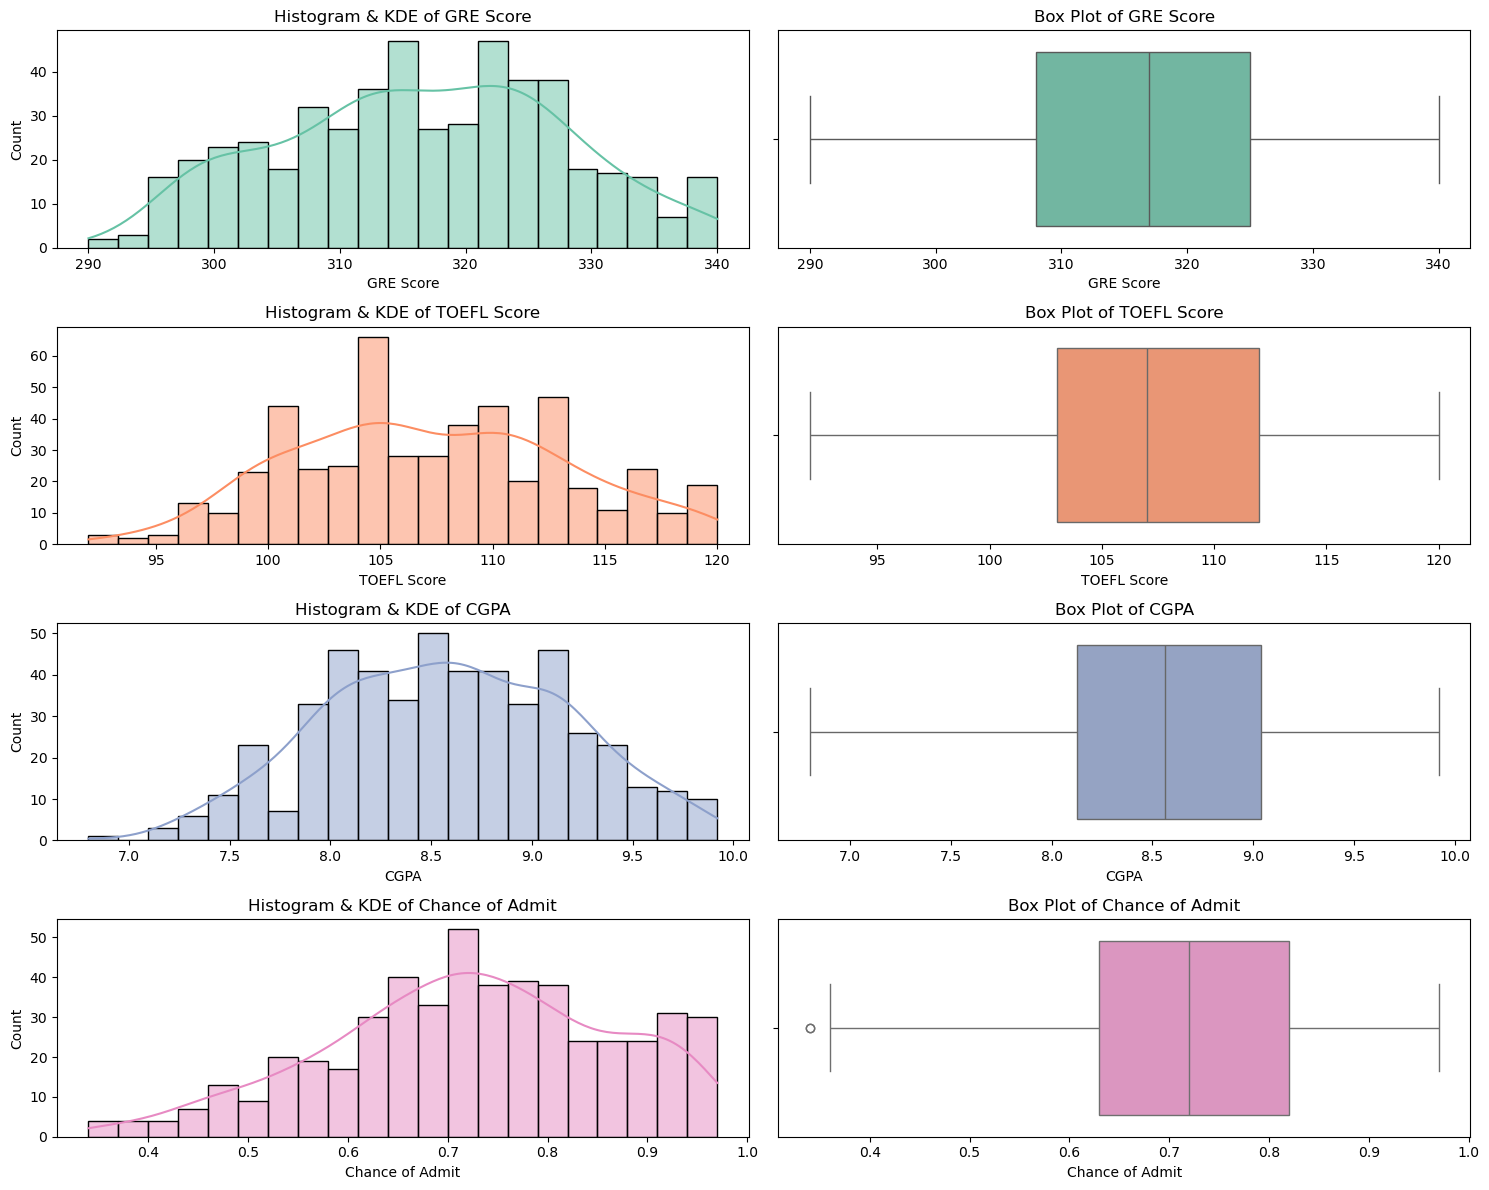

In [13]:
# Univariate Analysis - Numerical Data
## Histplot for Spread of the data
## Box plot for detecting Outliers

colors = sns.color_palette("Set2", len(num_cols))

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols):
    plt.subplot(4, 2, 2 * i + 1)
    sns.histplot(data[col], kde=True, bins=21, color=colors[i])
    plt.title(f"Histogram & KDE of {col}")

    plt.subplot(4, 2, 2 * i + 2)
    sns.boxplot(x=data[col], color=colors[i])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

- Most of them are normally distributed except for our Target variable (Chance of Admit), it is right skewed probably because of outlier in it.

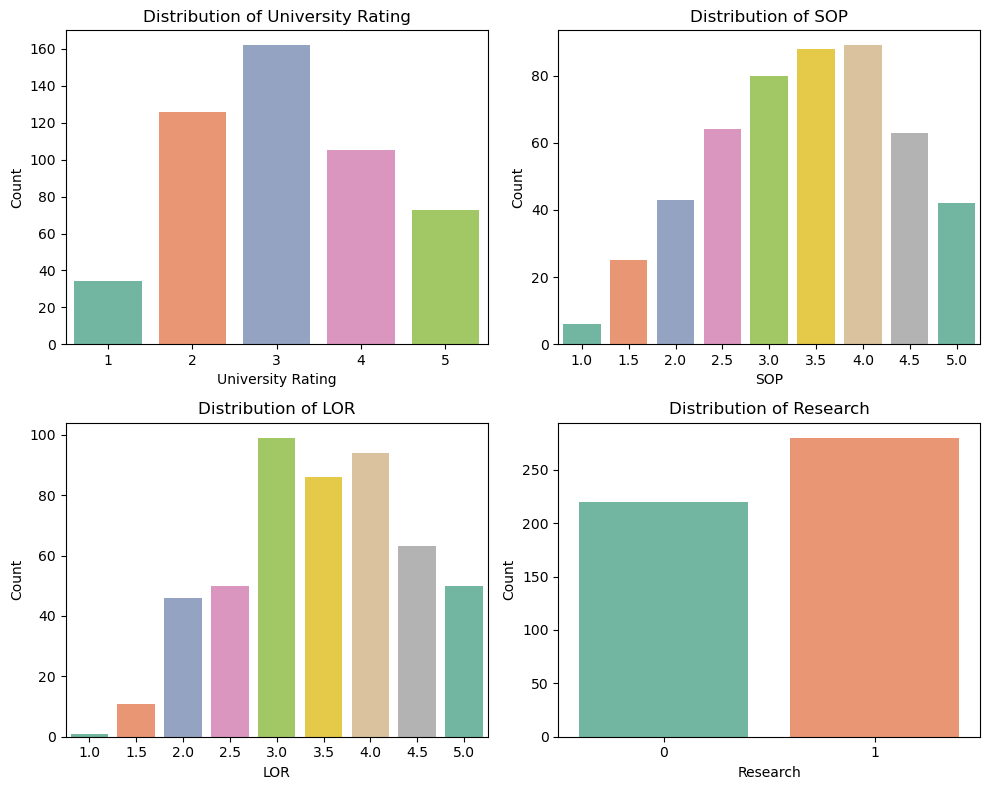

In [14]:
# Univariate Analsis for Categorical columns

plt.figure(figsize=(10, 8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    sns.countplot(x=data[col], palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

### Observations on Individual Feature level
##### Majority of the students have
- University rating around 3 in range of 1 to 5.
- SOP: 4 followed by 3.5, After that  only few students are able to achieve 4.5 or 5 rating/score.
- LOR: The similar pattern has been followed here as well, majority has achieved 3.5 to 4 raing but has decreased after the 4.0.
- more than 250 students have done the research and rest of them have not done it.

### Bivariate analysis

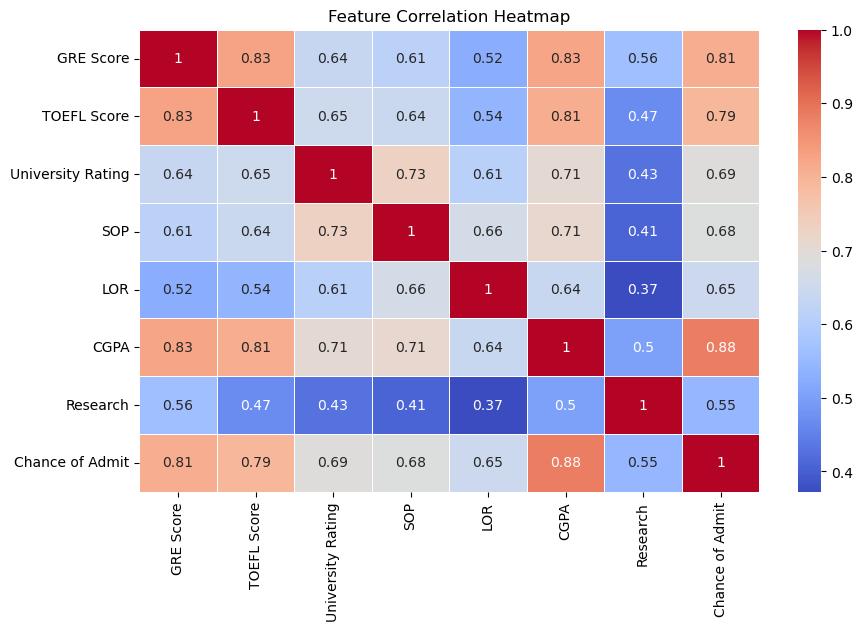

In [15]:
# identyfying the Correlation b.w the columns - HeatMap

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Observations from the above HeatMap:
- As our target variable is "Chance of Admit" let's check coorelation between target var and other features
- GRE Score, TOEFL score and CGPA have strong positive correlation with the target variable.
- where as University rating, SOP has alomst no impact on Target.<br>
##### Also there is some MultiCollinearity existing in between the Independent Columns Such as CGPA and TOEFL Score

<Figure size 1000x600 with 0 Axes>

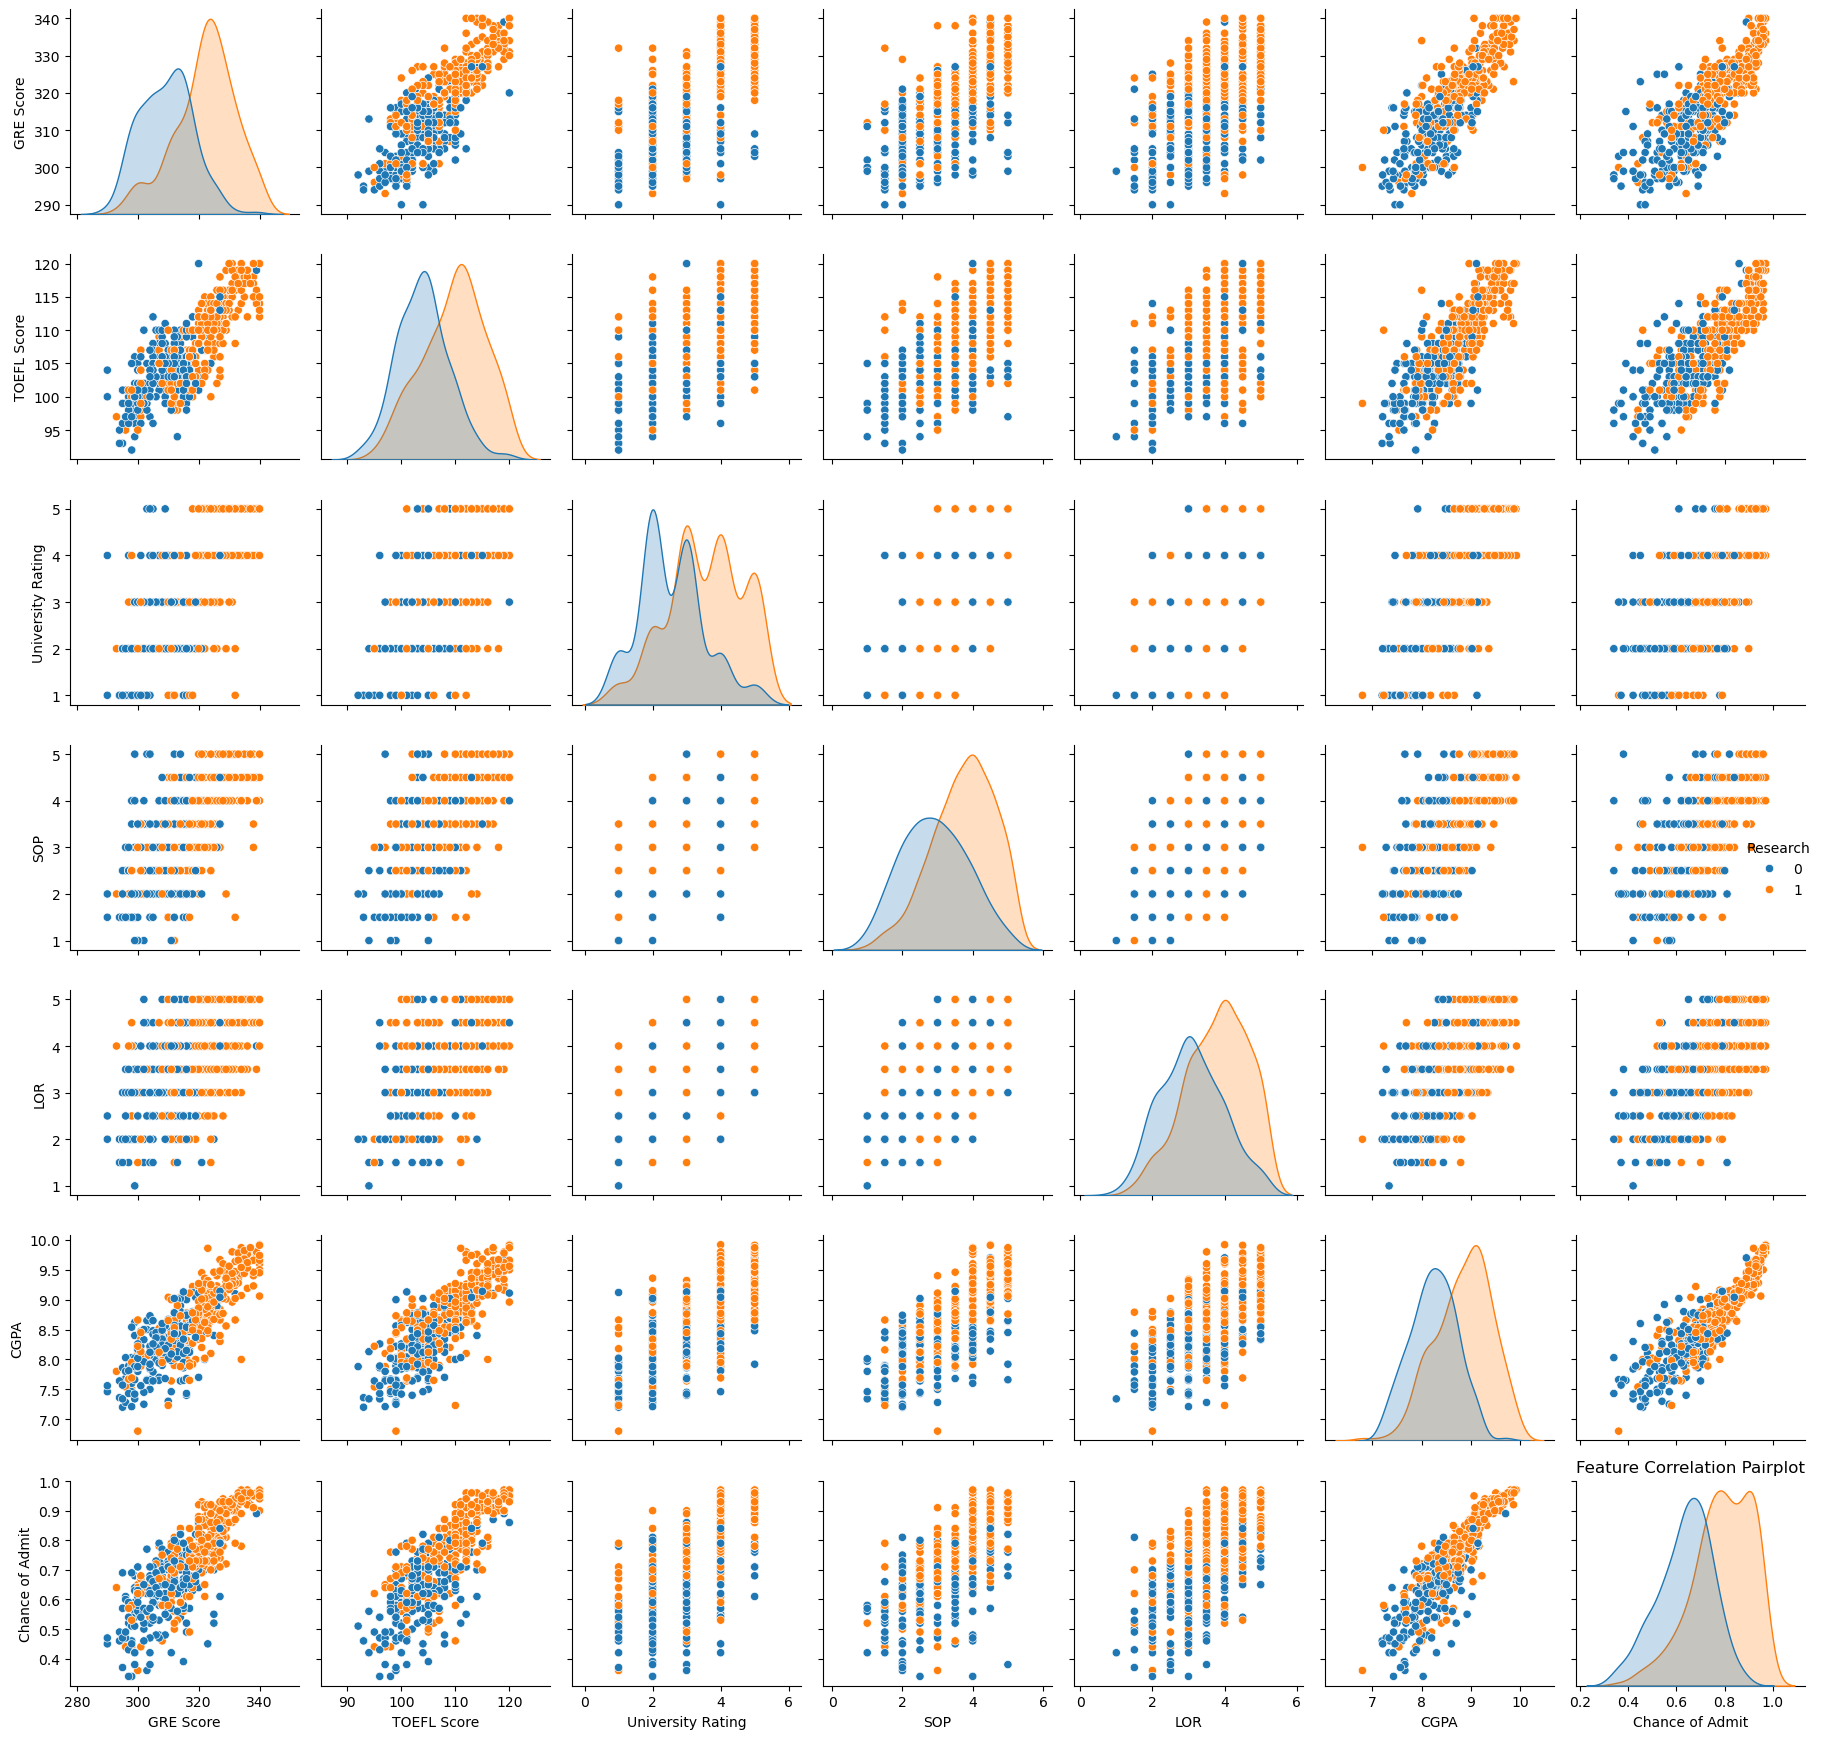

In [16]:
plt.figure(figsize=(10,6))
sns.pairplot(data, hue= "Research")
plt.title("Feature Correlation Pairplot")

plt.tight_layout()
plt.show()

### Observations from the above Pair Plot
- **Chance of Admit**: CGPA is Highly coorelated with tha Chance of Admission, Having HIGH CGPA increases Chances of Admission<br>Higher grade college prefer students with more CGPA. Hence doing great in college helps more than any other examination.
- GRE Score and TOEFL Score does matter after CGPA, Preparing well for this tests can have effect in the students career.
- SOP and LOR have significantly less effect of Chance of Admission. So spending less time on these and more time on College Academics can Help or increases chances of Admission.
- It is Obvious that students having high CGPA can also get good score in the other exams. That's there is positive correlation between CGPA, GRE Score and TOEFL score.
- Students having high grade in their exams and academics are extra focused that's why they have done research as well. 



## Model Building
- Prepare the data to build a model
- Separate the Input and Output variable and then Let's Split the data for Training and Testing.

In [17]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
# Split data into X and Y

Y = data['Chance of Admit']
X = data.iloc[:, : -1]

In [19]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
# split the data into Traing and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state=42)

print({
    "x_train": x_train.shape,
    "x_test": x_test.shape,
    "y_train": y_train.shape,
    "y_test": y_test.shape
})

{'x_train': (400, 7), 'x_test': (100, 7), 'y_train': (400,), 'y_test': (100,)}


In [21]:
## preprocessing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

StandardScaler's fit_transform() returns a NumPy array without column names. To use it in a DataFrame-based workflow (especially for inspection or combining with labels), we often convert it back into a DataFrame using the original column names, which we store beforehand.

In [22]:
## initialize the model Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [23]:
# Calculate the metric for the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred= model.predict(x_test_scaled)

def evaluate_errors(y_test, y_pred, features):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    n= len(y_pred)
    k = len(features)
    adjusted_r2 = 1-((1-r2)*((n-1)/(n-k-1)))

    print(f"Mean Squared Error (MSE): {mse}") # lower is better
    print(f"Mean Absolute Error (MAE): {mae}") # lower is better
    print(f"R-squared (R² Score): {r2}") # Tells the Accuracy
    print(f"Adjusted R² (R² Score): {adjusted_r2}")
    
evaluate_errors(y_test, y_pred, x_train.columns)

Mean Squared Error (MSE): 0.0037046553987884084
Mean Absolute Error (MAE): 0.04272265427705366
R-squared (R² Score): 0.8188432567829629
Adjusted R² (R² Score): 0.8050595915381884


In [24]:
model.coef_

array([0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
       0.06758106, 0.01194049])

In [25]:
model.intercept_

0.7241749999999999

## 🔹 Interpretation:

#### MAE (Mean Absolute Error): Measures average error in absolute terms.
- closer to the 0 - the better the model gets
- On an scale 0-1 the error values is close to 0 that is 0.04<br>
#### MSE (Mean Squared Error): Penalizes larger errors more than MAE.
- closer to the 0 - the better the model gets, here the error is 0.003
#### R² Score: Measures how well the model explains variance
- Higher the R-sqaure score the better the performance
- The R² values we got is 0.82 it means the model have 82% of Accuracy.
- But the R-squared does not explain the multicollinearity.


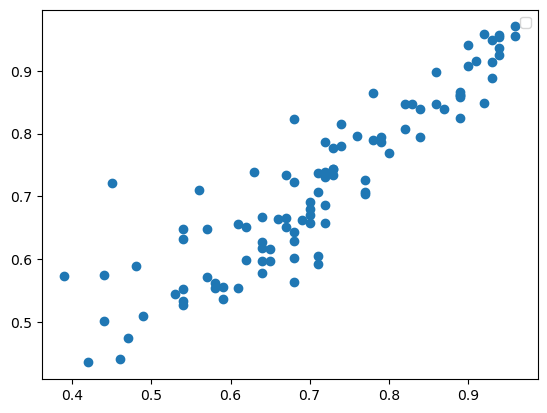

In [26]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.legend()
plt.show()

## Improve the metrics or Accuracy score

In [27]:
col_weis = pd.DataFrame(index= X.columns,data= model.coef_, columns= ['weights'])
col_weis

,weights
GRE Score,0.026671
TOEFL Score,0.018226
University Rating,0.002940
SOP,0.001788
LOR,0.015866
CGPA,0.067581
Research,0.011940


### Two method to build other Linear Regression Models for better accuracy
1. one is using **sklearn method**, with the help of **Linear Regression, Lasso Regression or Ridge Regression**.
2. Another one is OLS method from **stats model**.

### Build Model using sklearn methods

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score


models = [
    ['Linear Regression:', LinearRegression()],
    ['Lasso Regression:', Lasso(alpha= 0.1)],
    ['Ridge Regression:', Ridge(alpha=1.0)]
]

print("Results for the linear regression models....")

for name,model in models:
    model.fit(x_train_scaled, y_train)
    predictions = model.predict(x_test_scaled)
    print('-'*50)
    print(name)
    evaluate_errors(y_test, predictions, x_train.columns)
    # print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results for the linear regression models....
--------------------------------------------------
Linear Regression:
Mean Squared Error (MSE): 0.0037046553987884084
Mean Absolute Error (MAE): 0.04272265427705366
R-squared (R² Score): 0.8188432567829629
Adjusted R² (R² Score): 0.8050595915381884
--------------------------------------------------
Lasso Regression:
Mean Squared Error (MSE): 0.014988926561014377
Mean Absolute Error (MAE): 0.0981482002289395
R-squared (R² Score): 0.2670451559406174
Adjusted R² (R² Score): 0.2112768525882731
--------------------------------------------------
Ridge Regression:
Mean Squared Error (MSE): 0.003705774363798815
Mean Absolute Error (MAE): 0.04274719474628152
R-squared (R² Score): 0.8187885396675396
Adjusted R² (R² Score): 0.8050007111639829


### Summary of Linear Regression Model Results:

* **Linear Regression and Ridge Regression** performed almost identically, both achieving:

  * **Low MSE (\~0.0037)**
  * **Low MAE (\~0.0427)**
  * **High R² (\~0.819)**
  * **Adjusted R² around 0.805**

* **Lasso Regression** performed significantly worse:

  * **Higher MSE (0.0149)** and **MAE (0.0981)**
  * **Much lower R² (0.267)** and **Adjusted R² (0.211)**

### Interpretation:

Lasso likely **over-penalized coefficients**, reducing model performance. Ridge maintained model complexity while controlling overfitting better. For this dataset, **Linear or Ridge Regression is more suitable**, while Lasso may be too aggressive in feature shrinking.


### Build a model using OLS.

In [29]:
X_train = pd.DataFrame(x_train_scaled, columns= x_train.columns)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [30]:
# let's start with ols model 
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
sm_model = sm.OLS(y_train.values, X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          3.41e-142
Time:                        12:25:01   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

#### Ordinary Least Squares(OLS) model has given the above results.
- R² has 81% of accuracy and adjusted R² has 81.4.
- In OLS we have multiple useful features are present in which p value is one them
- It says the significance of the features in a model. That is if p > 0.05 then the feature is not much significant.
- In the above model the SOP and University rating ahs higher significant let's remove them one by one then calculate the score.

In [31]:
X_train = X_train.drop(['SOP'], axis= 1)
X_train.head()

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,0.389986,0.602418,-0.098298,0.564984,0.415018,0.895434
1,1.0,-0.066405,0.602418,0.775459,1.651491,-0.067852,-1.116777
2,1.0,-1.253022,-0.876917,-0.098298,-0.521524,-0.134454,-1.116777
3,1.0,-0.248961,-0.055064,-0.972054,0.564984,-0.517420,-1.116777
4,1.0,-0.796631,-0.219435,-0.098298,-1.064777,-0.617324,0.895434


In [32]:
sm_model = sm.OLS(y_train.values, X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          2.01e-143
Time:                        12:25:01   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [33]:
# let's remove University Rating as well
X_train = X_train.drop(['University Rating'], axis= 1)

sm_model = sm.OLS(y_train.values, X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        12:25:01   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

# Assumptions of LinearRegression Model

## Multicollinearity Check - Passed
- Even though we got it checked using the Statsmodel api, we can also use another method using VIF(variance Influence Factor`)
- “ VIF score of an independent variable represents how well the variable is explained by other independent variables.
- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

##### Do the Same process using other Linear Model such as Ridge Regression and Lasso Regression

In [35]:
calculate_vif(X_train,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.471557
2,TOEFL Score,3.540082
3,LOR,1.655867
4,CGPA,4.281365
5,Research,1.504670


### No Multicollinearity
- Independent variables should not be too higly correlated with eachother.
- Here we can use VIF in order to overcome multicollinearity
1. After training the model Find R² and to calculate VIF<br> 
    VIF = 1/ 1- R²
2. Calcuate VIF for each independent variable
3. Check the variable with highest VIF
4. Remove the variable with highest VIF
5. Re-fit the model without the removed one.
6. Continue the process till the end.


**VIF for all the columns seems fine, as there is no multicollinearity between any of the columns,That's why the first assumption of Multicollinearity has been Satisfied.**

## Linearity Check - Linear and Ridge - Passed

In [36]:
# store predictions
y_pred_values = []

for name, model in models:
    y_pred = model.predict(x_test_scaled)
    y_pred_values.append(y_pred)

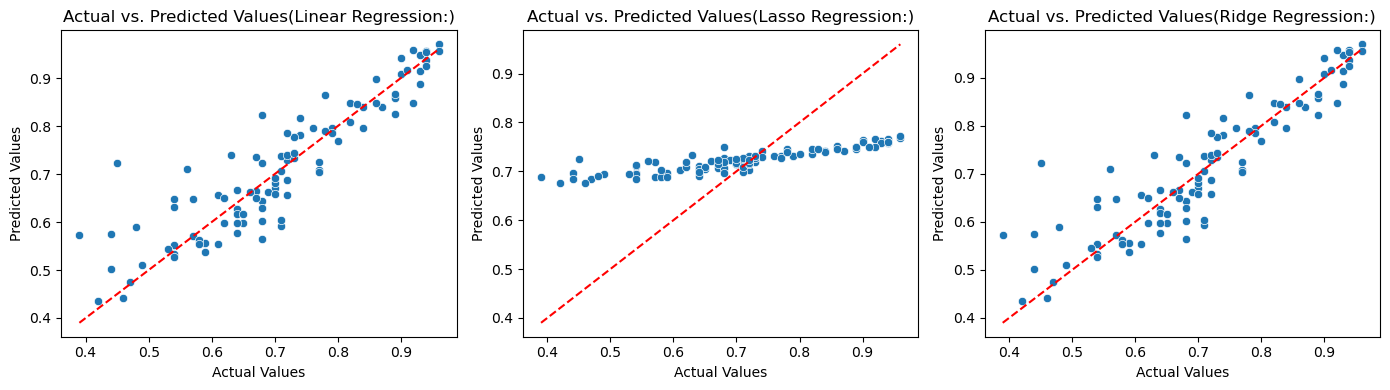

In [38]:

plt.figure(figsize=(14,4))

for i, prediction in enumerate(y_pred_values, 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=y_test, y=prediction)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line (ideal case)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values({models[i-1][0]})")  

plt.tight_layout()    
plt.show()

Based on the Actual vs. Predicted plots, **Linear and Ridge Regression** maintain strong linearity, as their predictions closely follow the ideal diagonal line. In contrast, **Lasso Regression fails the linearity check**, showing signs of underfitting and weak alignment with actual values. Therefore, Linear or Ridge Regression are more appropriate for this dataset.

## Homoscedasticity Check

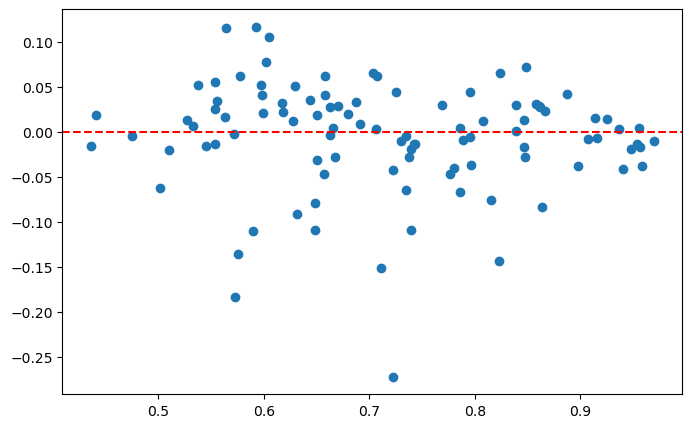

In [39]:
# calculate residuls

residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(y= 0, color= 'red', linestyle= '--')
plt.show()

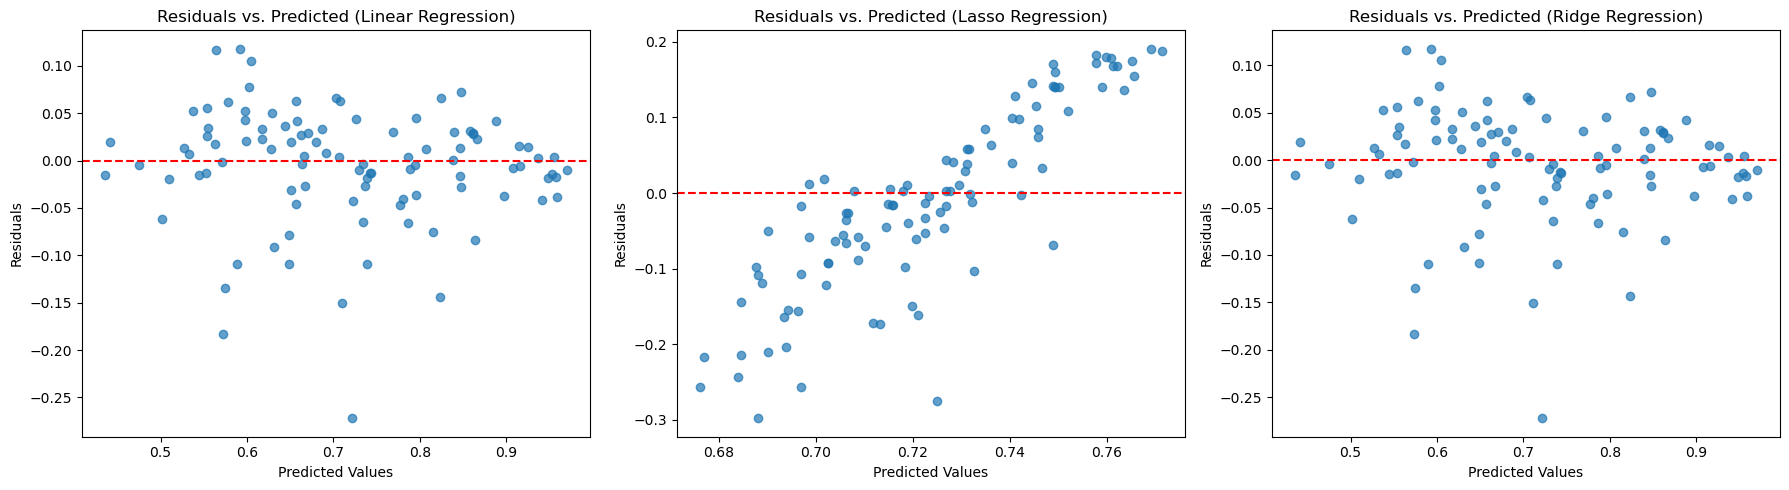

In [40]:
# Get predictions
y_pred_lin = models[0][1].predict(x_test_scaled)
y_pred_lasso = models[1][1].predict(x_test_scaled)
y_pred_ridge = models[2][1].predict(x_test_scaled)

# Calculate residuals
residuals_lin = y_test - y_pred_lin
residuals_lasso = y_test - y_pred_lasso
residuals_ridge = y_test - y_pred_ridge

# Setup plot
plt.figure(figsize=(18, 5))
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
predictions = [y_pred_lin, y_pred_lasso, y_pred_ridge]
residuals = [residuals_lin, residuals_lasso, residuals_ridge]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(predictions[i], residuals[i], alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs. Predicted ({model_names[i]})")

plt.tight_layout()
plt.show()


The above scatter plot conclude that, Linear and Ridge Regression has not heteroskedasticity whereas Lasso is going from bottom to top which is not ideal. Hence we can disregard lasso model and Check mark Heterockedasticity for Linear and Ridge models 

## Check Normality of the Residuals

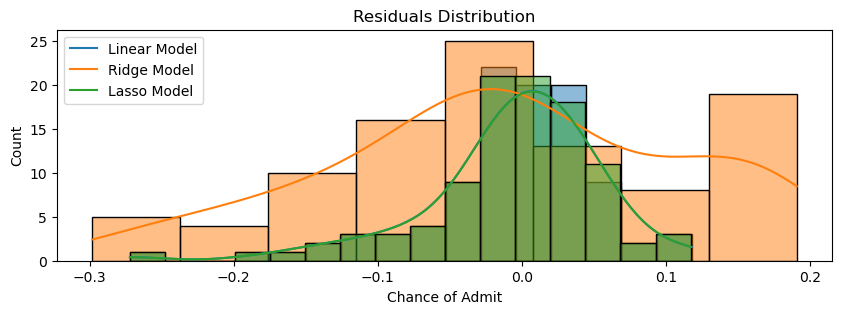

In [41]:
plt.figure(figsize=(10,3))
for prediction in y_pred_values:
    residuals = 0
    residuals = y_test - prediction
    sns.histplot(residuals, kde= True)
    plt.legend(['Linear Model', 'Ridge Model', 'Lasso Model'])
    plt.title("Residuals Distribution")
plt.show()

##### Ridge Regression have the better results than Lasso Regression - Probably because of multicollinearty 

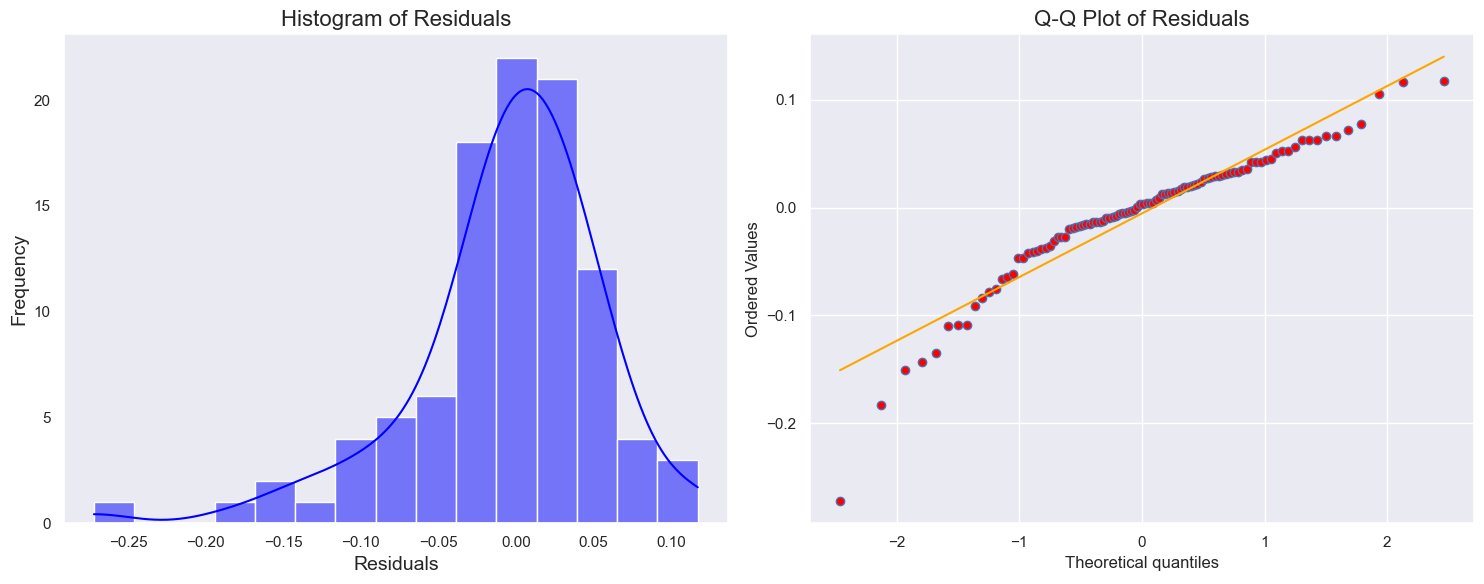

In [42]:
sns.set_theme(style='dark')
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# for Linear Regression model

residuals = y_test - y_pred
# Histogram of Residuals
sns.histplot(residuals, bins=15, kde=True, color='blue', ax=axs[0])
axs[0].set_title('Histogram of Residuals', fontsize=16)
axs[0].set_xlabel('Residuals', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].grid(False)

# Q-Q Plot
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].get_lines()[1].set_color('orange')
axs[1].get_lines()[0].set_markerfacecolor('red')
axs[1].set_title('Q-Q Plot of Residuals', fontsize=16)
axs[1].grid(True)

plt.tight_layout()
plt.show()

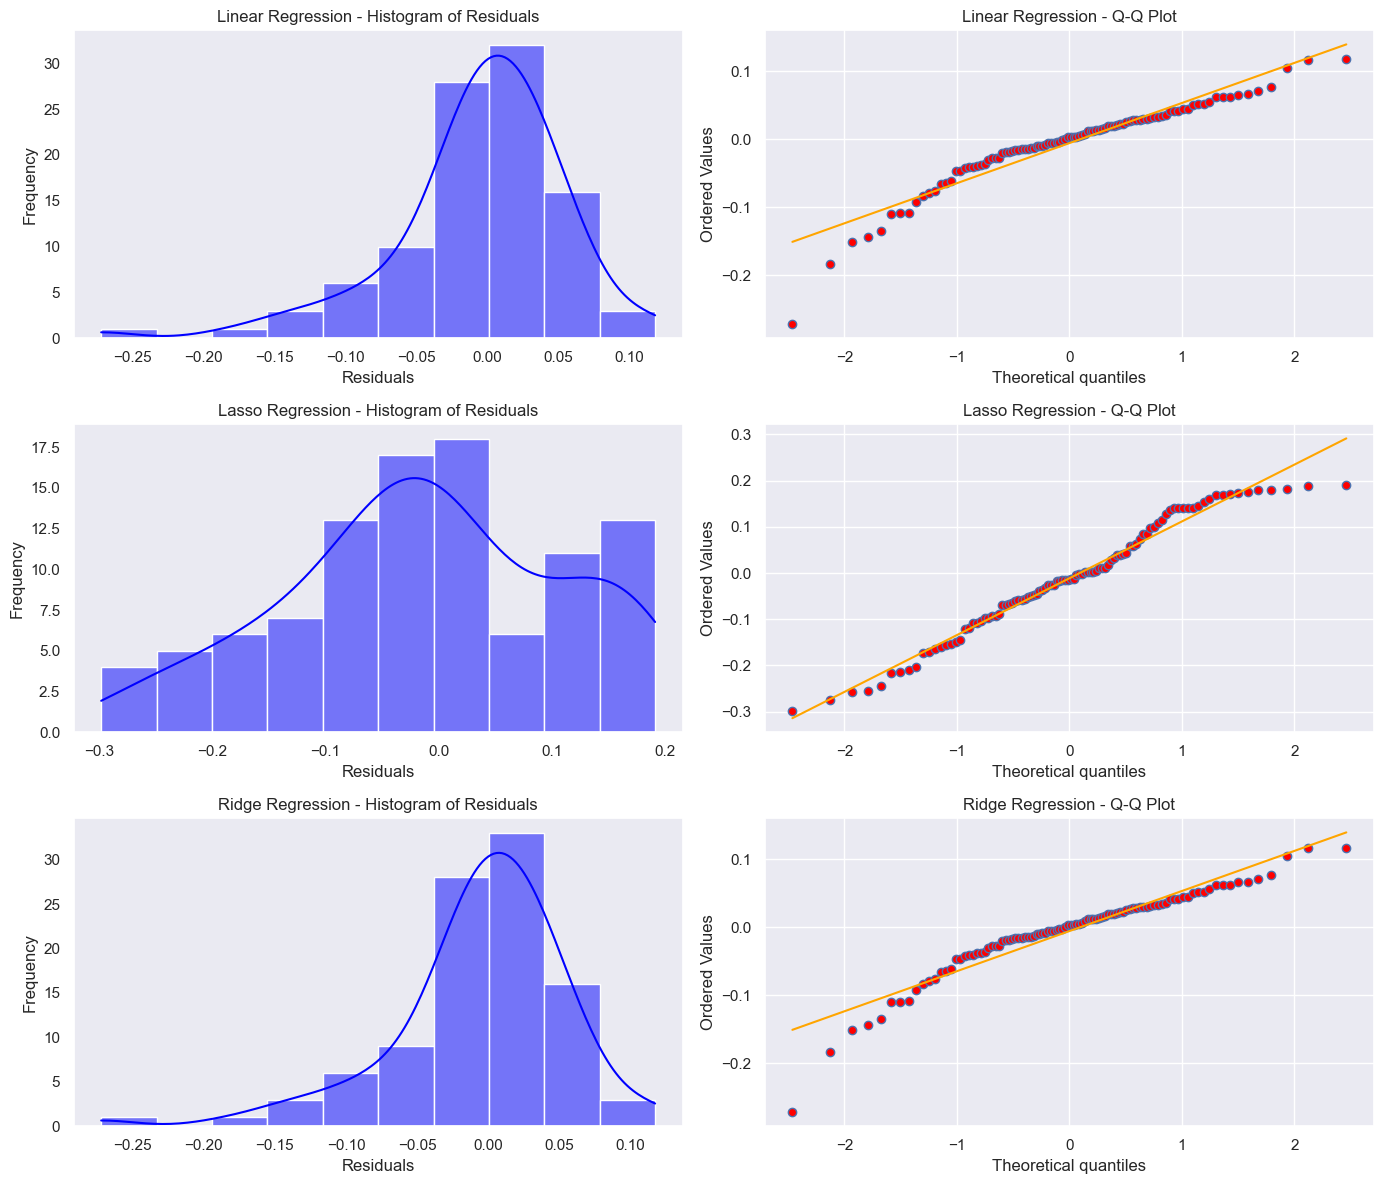

In [43]:
sns.set_theme(style='dark')

model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']

# Setup a 3-row, 2-column grid (one row per model)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

for i, prediction in enumerate(y_pred_values):
    residuals = y_test - prediction
    
    # Histogram with KDE
    sns.histplot(residuals, bins=10, kde=True, color='blue', ax=axs[i, 0])
    axs[i, 0].set_title(f'{model_names[i]} - Histogram of Residuals', fontsize=12)
    axs[i, 0].set_xlabel('Residuals')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].grid(False)
    
    # Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axs[i, 1])
    axs[i, 1].get_lines()[1].set_color('orange')
    axs[i, 1].get_lines()[0].set_markerfacecolor('red')
    axs[i, 1].set_title(f'{model_names[i]} - Q-Q Plot', fontsize=12)
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()


### Q-Q Plot & Histogram Analysis:
- The **Q-Q plot** shows some deviation from the normal distribution, particularly at the tails, indicating residuals may not be perfectly normally distributed.
- The **histogram** indicates that most residuals are clustered around zero, with fewer outliers as you move away from zero, supporting the assumption of normality, though not perfectly.


In [44]:

for i, prediction in enumerate(y_pred_values):
    residuals = y_test - prediction
    shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
    print('-'*50)
    print(f'Shapiro-Wilk Test Statistic for {models[i][0]} {shapiro_stat}, p-value: {shapiro_p_value}')
    
    if shapiro_p_value > 0.05:
        print("Fail to reject the null hypothesis: Residuals are normally distributed.")
    else:
        print("Reject the null hypothesis: Residuals are not normally distributed.")

--------------------------------------------------
Shapiro-Wilk Test Statistic for Linear Regression: 0.9178703251544256, p-value: 1.0869980466509114e-05
Reject the null hypothesis: Residuals are not normally distributed.
--------------------------------------------------
Shapiro-Wilk Test Statistic for Lasso Regression: 0.9705873873874831, p-value: 0.02452051632933148
Reject the null hypothesis: Residuals are not normally distributed.
--------------------------------------------------
Shapiro-Wilk Test Statistic for Ridge Regression: 0.9175850593277237, p-value: 1.0503035282816964e-05
Reject the null hypothesis: Residuals are not normally distributed.


## Check Independence(No AutoCorrelation)

In [45]:
from statsmodels.stats.stattools import durbin_watson

for i, prediction in enumerate(y_pred_values):
    residuals = y_test - prediction
    durbin_watson_results = durbin_watson(residuals)
    print('-'*50)
    print(f'Durbin Watson Test Statistic for {models[i][0]} {durbin_watson_results}')
    
    if durbin_watson_results < 1 or durbin_watson_results > 3:
        print("There is Strong Auto Correlation between independent variable which mean not good model")
    else:
        print("No Correlation, AutoCoorelation Assumption Passed")

--------------------------------------------------
Durbin Watson Test Statistic for Linear Regression: 2.238799667437851
No Correlation, AutoCoorelation Assumption Passed
--------------------------------------------------
Durbin Watson Test Statistic for Lasso Regression: 2.1057311747662335
No Correlation, AutoCoorelation Assumption Passed
--------------------------------------------------
Durbin Watson Test Statistic for Ridge Regression: 2.2415890789602946
No Correlation, AutoCoorelation Assumption Passed


## Insights:
- Both Base Linear and Ridge models perform best, achieving 82% accuracy; Lasso model fails to show any accuracy.
- High collinearity among CGPA, GRE, and TOEFL scores reduced model accuracy to 81%.
- Combined score is the most important feature, followed by LOR and Research.
- University ratings and SOP have little impact, but a strong research background and LOR/SOP significantly increase admission chances.
- Assumptions for Linear Regression were met; however, the Shapiro-Wilk test failed, suggesting non-normality. The Q-Q plot shows minor deviation from 0.

### Recommendations:
- Data on rejected students would help balance the right-skewed "Chance of Admit."
- To improve accuracy, add more independent features like:
  - **Work Experience:** Insights into practical skills.
  - **Internships:** Real-world application of knowledge.
  - **Extracurricular Activities:** Leadership, teamwork, and diverse interests.
  - **Diversity Variables:** Capture diverse backgrounds for a holistic evaluation.
